In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Financial Returns

In [7]:
data = pd.read_csv(
    "data/MSFTPrices.csv",
    parse_dates=["Date"]
)

data.sort_values(by="Date")
data.set_index("Date", inplace=True)

data.head()

,Open,High,Low,Close,Volume,Adjusted
Date,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [9]:
data["returns"] = data["Adjusted"].pct_change()
data.head(3)

,Open,High,Low,Close,Volume,Adjusted,returns
Date,,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544


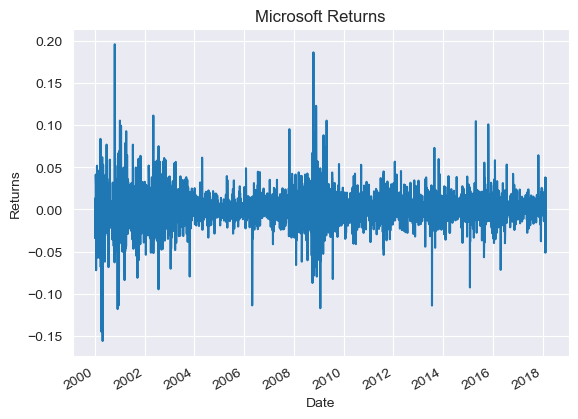

In [12]:
data.returns.plot()
plt.title("Microsoft Returns")
plt.ylabel("Returns");

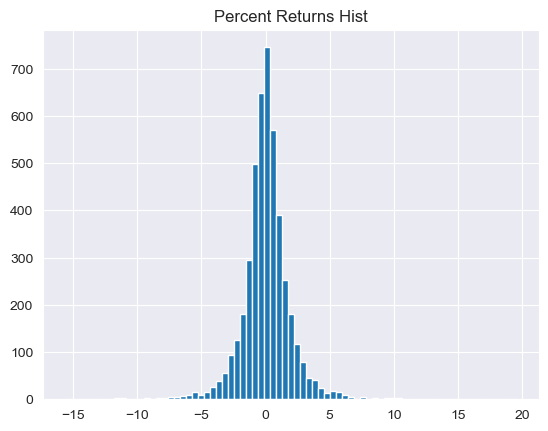

In [14]:
percent_returns = data.returns * 100
percent_returns.dropna(inplace=True)

plt.hist(percent_returns, bins=75)
plt.title("Percent Returns Hist");

# Mean, variance, and normal distribution


In [18]:
mean_return_daily = data.returns.mean()
print(f"Mean return: {mean_return_daily:5f}")

Mean return: 0.000378


In [23]:
mean_return_annualized = ((1 + mean_return_daily)** 252) -1
print(f"Mean return annualized: {mean_return_annualized:5f}")

Mean return annualized: 0.099858


In [25]:
sigma_daily = np.std(data.returns)
print(f"Daily Standard Deviation: {sigma_daily:.5f}")

Daily Standard Deviation: 0.01934


In [26]:
variance_daily = sigma_daily ** 2
print(f"Daily Variance: {variance_daily:.5f}")

Daily Variance: 0.00037


In [27]:
#Annualizing variance

sigma_annualized = sigma_daily*np.sqrt(252)
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized ** 2
print(variance_annualized)

0.3070304505826317
0.09426769758497383


# Skewness and kurtosis

Test for normality using Shapiro-Wilk Test

In [37]:
from scipy.stats import skew, kurtosis, shapiro

In [34]:
skew(data.returns.dropna())

0.21935459193067805

In [35]:
# excess of kurtosis
kurtosis(data.returns.dropna())

10.314572618025519

In [36]:
kurtosis(data.returns.dropna()) + 3

13.314572618025519

In [38]:
shapiro(data.returns.dropna())

ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)